In [127]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline


In [128]:

from sklearn.impute import SimpleImputer 
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

In [129]:
df= pd.read_csv('data/hmQOVnDvRN.xls')

In [130]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [131]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [132]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [133]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)
df['TotalCharges'] = df['TotalCharges'].astype(float)


### Handling missing values

In [134]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [135]:
mean = df['TotalCharges'].mean()
df['TotalCharges'] = df['TotalCharges'].fillna(mean)


In [136]:
Demographics = ['gender', 'SeniorCitizen','Partner', 'Dependents']
AccountInfo = ['tenure', 'Contract', 'PaperlessBilling', 'PaymentMethod']
Sevices = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
            'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
Financials = ['MonthlyCharges', 'TotalCharges']

In [137]:
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "No"
    
df["SeniorCitizen"]=df["SeniorCitizen"].apply(conv)

### Bivariate Analysis

#### 1.Plots


#### 1.1 Churn vs Demographic features

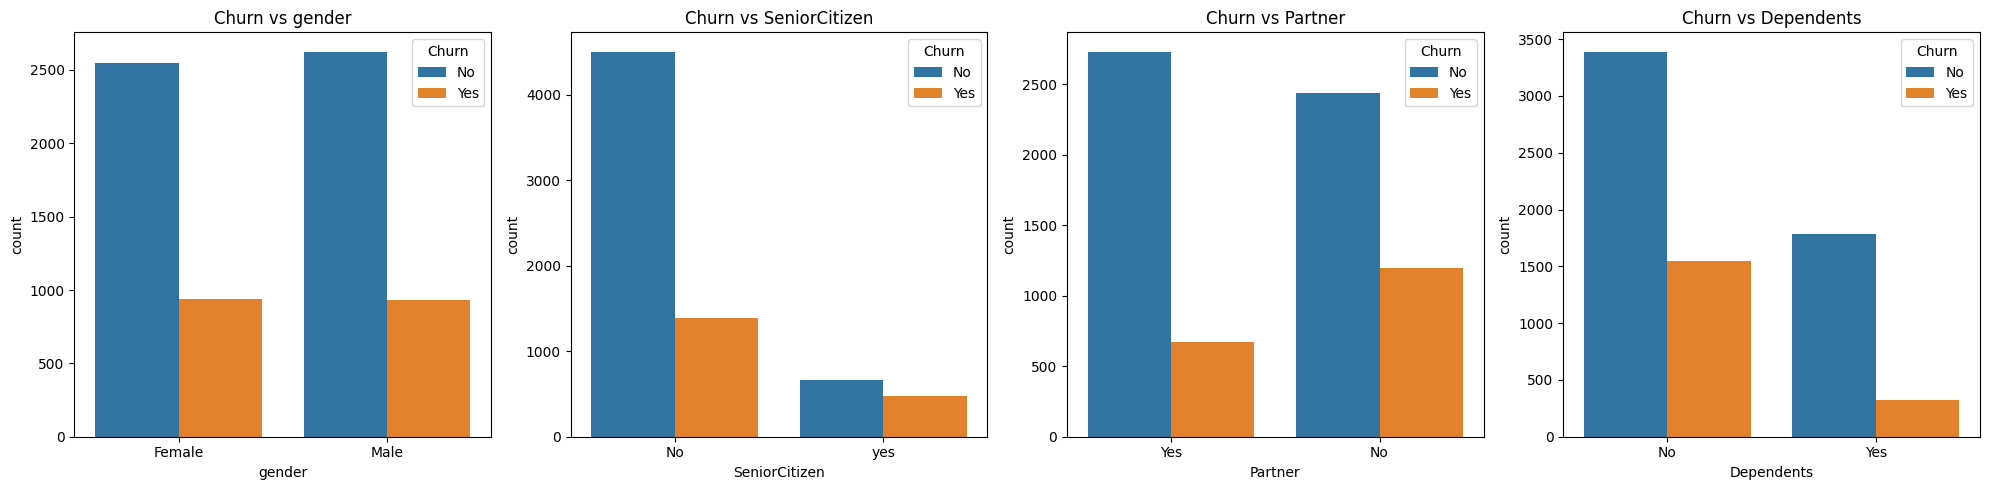

In [138]:
fig, axes = plt.subplots(1, len(Demographics), figsize=(20, 5))
for i, col in enumerate(Demographics):
    sns.countplot(x=col, hue='Churn', data=df, ax=axes[i])
    axes[i].set_title(f'Churn vs {col}')
plt.tight_layout()
plt.show()

#### 1.2 Churn vs AccountInfo features

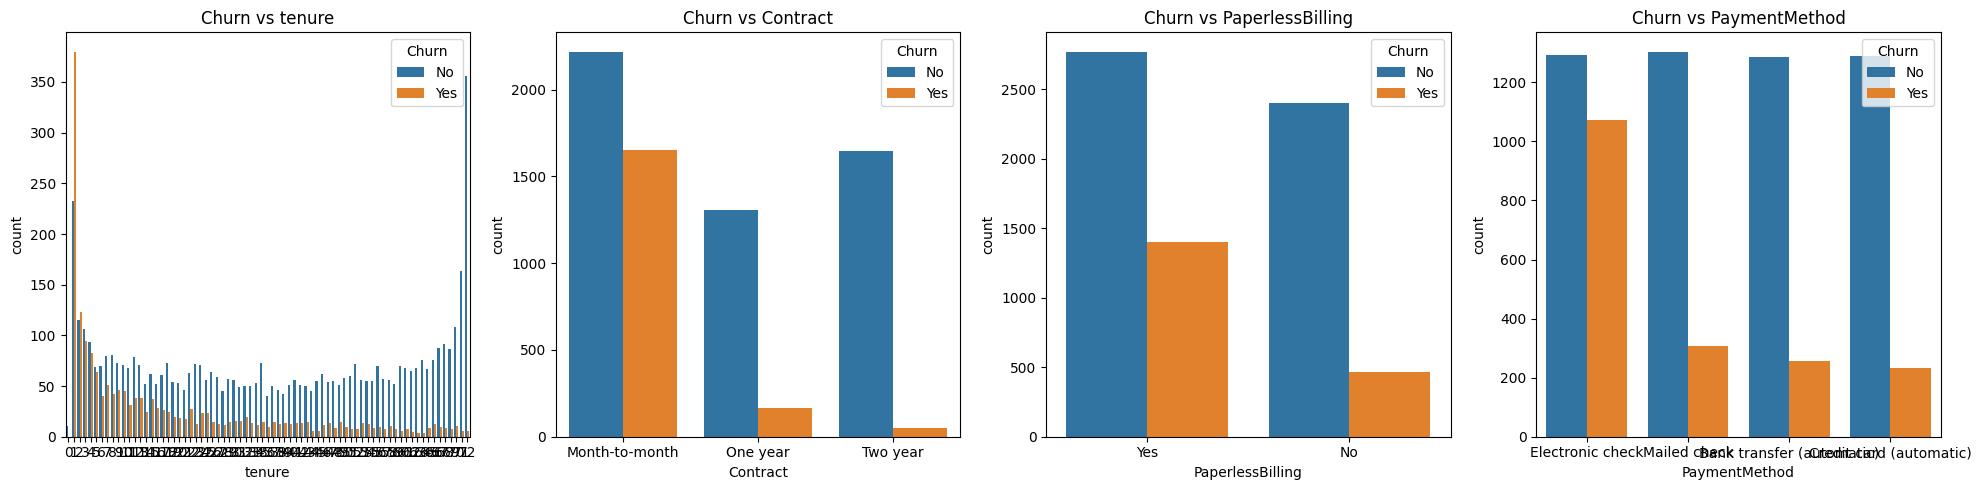

In [139]:
fig, axes = plt.subplots(1, len(AccountInfo), figsize=(20, 5))
for i, col in enumerate(AccountInfo):
    sns.countplot(x=col, hue='Churn', data=df, ax=axes[i])
    axes[i].set_title(f'Churn vs {col}')
plt.tight_layout()
plt.show()

#### 1.3 Churn vs Service features

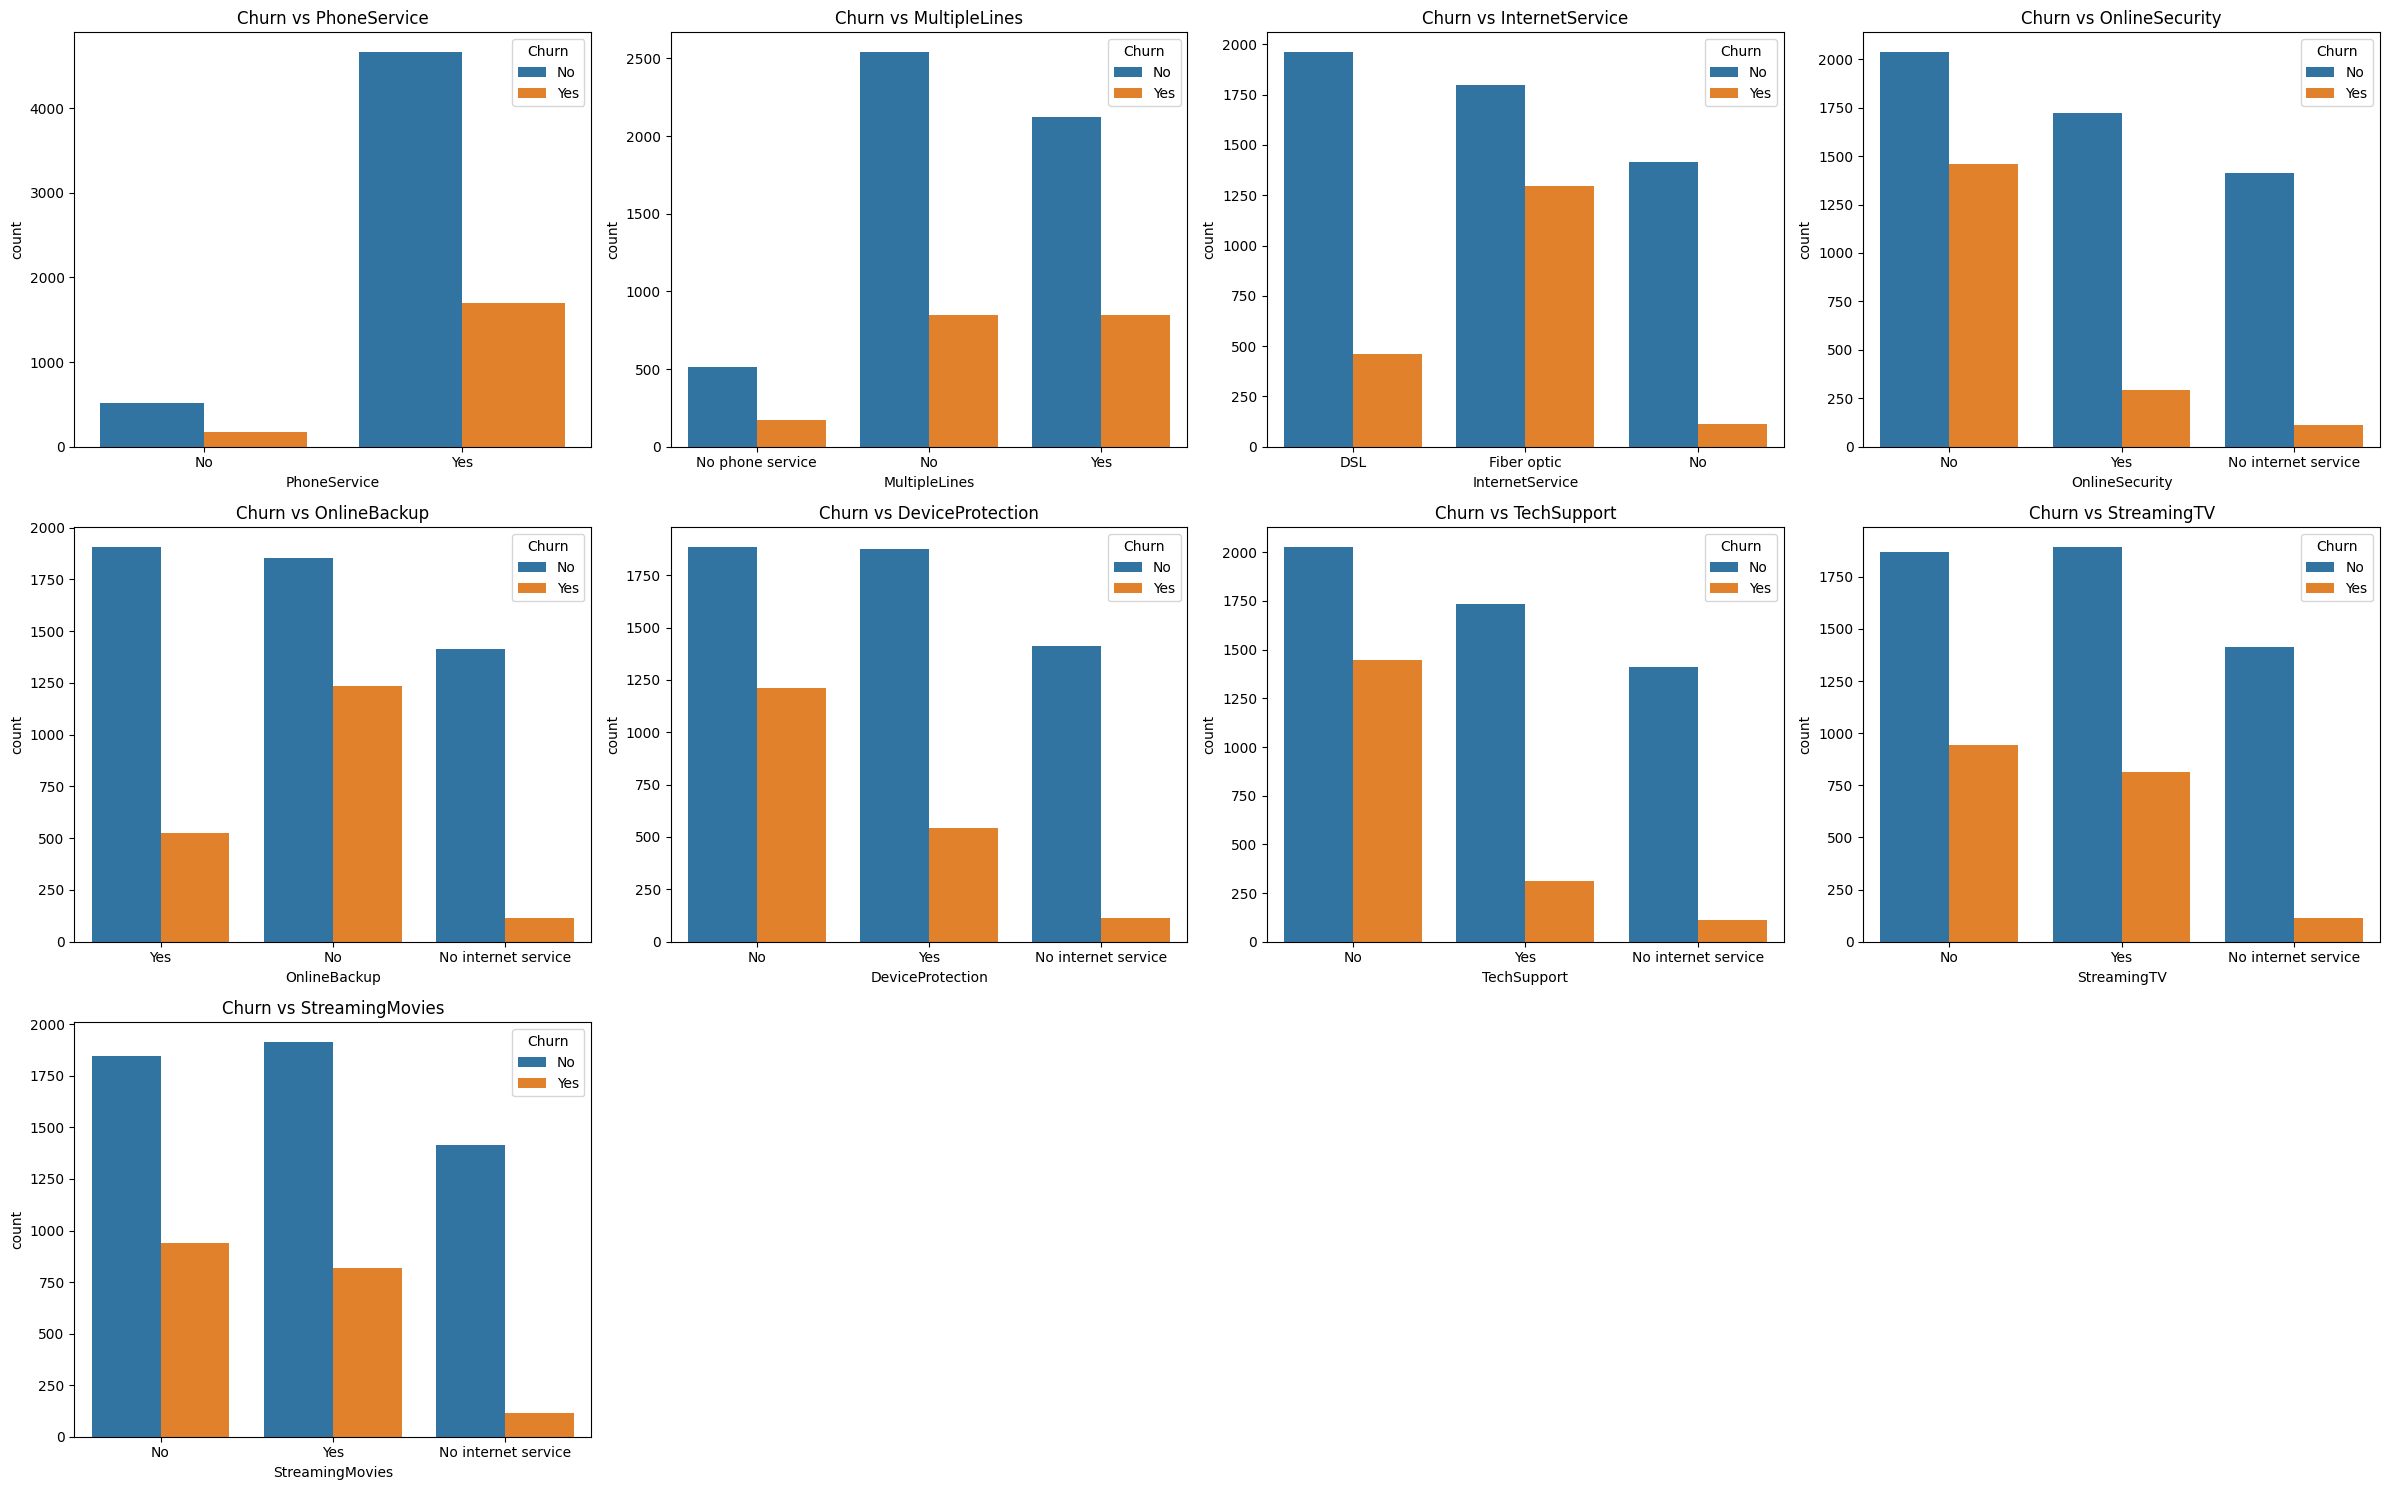

In [140]:
import math

cols_per_row = 4
num_charts = len(Sevices)
num_rows = math.ceil(num_charts / cols_per_row)

fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(6 * cols_per_row, 5 * num_rows))

for i, col in enumerate(Sevices):
    row = i // cols_per_row
    col_idx = i % cols_per_row
    sns.countplot(x=col, hue='Churn', data=df, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'Churn vs {col}')

# Hide unused axes if any
for j in range(num_charts, num_rows * cols_per_row):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

In [141]:
df['Churn_numeric'] = df['Churn'].map({'No': 0, 'Yes': 1})

In [142]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_numeric
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1


### 2. correlation matrix for numerical features

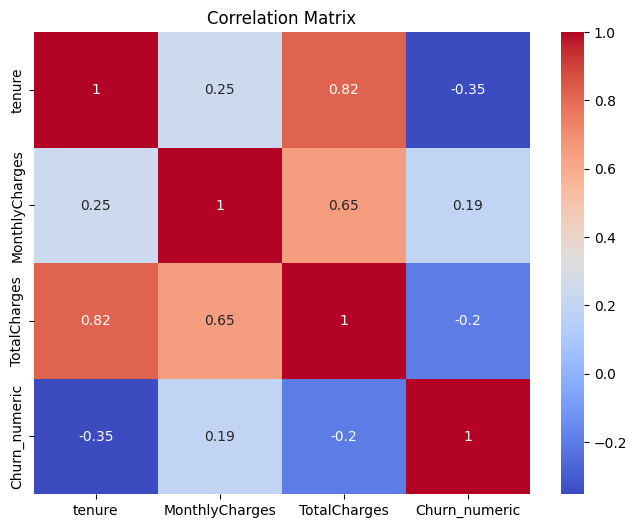

In [143]:
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges' ]
corr = df[numerical_features + ['Churn_numeric']].corr(method='pearson')
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

- features don't show strong linear relationships with churn.

In [144]:
from scipy.stats import spearmanr

# Spearman correlation
spearman_monthly, p_monthly = spearmanr(df['MonthlyCharges'], df['Churn_numeric'])
spearman_total, p_total = spearmanr(df['TotalCharges'], df['Churn_numeric'])

print(f"Spearman correlation - MonthlyCharges: {spearman_monthly:.3f}")
print(f"Spearman correlation - TotalCharges: {spearman_total:.3f}")

Spearman correlation - MonthlyCharges: 0.185
Spearman correlation - TotalCharges: -0.232


- features don't show strong non-linear relationships with churn.

### 3. chi-sqare test for categorical features

In [145]:
from scipy.stats import chi2_contingency

categorical_features = Demographics + AccountInfo + Sevices
categorical_features.remove('tenure')
chi2_results = {}

for col in categorical_features:
    contingency_table = pd.crosstab(df[col], df['Churn'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi2_results[col] = {'chi2': chi2, 'p-value': p}

chi2_df = pd.DataFrame.from_dict(chi2_results, orient='index')
chi2_df = chi2_df.reset_index().rename(columns={'index': 'Feature', 'chi2': 'Chi2 Statistic', 'p-value': 'P-Value'})

# Display the table
print(chi2_df)

             Feature  Chi2 Statistic        P-Value
0             gender        0.484083   4.865787e-01
1      SeniorCitizen      159.426300   1.510067e-36
2            Partner      158.733382   2.139911e-36
3         Dependents      189.129249   4.924922e-43
4           Contract     1184.596572  5.863038e-258
5   PaperlessBilling      258.277649   4.073355e-58
6      PaymentMethod      648.142327  3.682355e-140
7       PhoneService        0.915033   3.387825e-01
8      MultipleLines       11.330441   3.464383e-03
9    InternetService      732.309590  9.571788e-160
10    OnlineSecurity      849.998968  2.661150e-185
11      OnlineBackup      601.812790  2.079759e-131
12  DeviceProtection      558.419369  5.505219e-122
13       TechSupport      828.197068  1.443084e-180
14       StreamingTV      374.203943   5.528994e-82
15   StreamingMovies      375.661479   2.667757e-82


### Feature Engineering

In [146]:
from scipy.stats import chi2_contingency

def quick_feature_test(df, feature, target):
	contingency_table = pd.crosstab(df[feature], df[target])
	chi2, p, dof, expected = chi2_contingency(contingency_table)
	return chi2, p


In [147]:
support_services = ['OnlineBackup', 'DeviceProtection', 'OnlineSecurity', 'TechSupport']
df['Services_Score'] = 0
for service in support_services:
	df['Services_Score'] += (df[service] == 'Yes').astype(int)
chi2_score, p_value = quick_feature_test(df, 'Services_Score', 'Churn')
print(f"Chi² = {chi2_score:.2f}, p = {p_value:.4f}")

Chi² = 338.97, p = 0.0000


In [148]:
df['Services_Score'].unique()

array([1, 2, 3, 0, 4])

In [149]:
# Convert SeniorCitizen to integer for calculation
senior_citizen_numeric = df['SeniorCitizen'].map({'yes': 1, 'No': 0})

df['Vulnerability_Score'] = (
    senior_citizen_numeric * 2 +
    (df['Partner'] == 'No').astype(int) +
    (df['Dependents'] == 'No').astype(int) +
    (df['Contract'] == 'Month-to-month').astype(int) * 2 +
    np.where(df['tenure'] < 12, 2, 0)
)
chi2_score, p_value = quick_feature_test(df, 'Vulnerability_Score', 'Churn')
print(f"Chi² = {chi2_score:.2f}, p = {p_value:.4f}")

Chi² = 1307.20, p = 0.0000


In [150]:
df['Vulnerability_Score'].unique()

array([5, 2, 6, 3, 1, 4, 0, 8, 7])

Note :
- 0-1: Low vulnerability (married, long contract, established)
- 2-4: Moderate vulnerability
- 5-8: High vulnerability (senior, single, new, no commitment)

In [151]:
df['avg_monthly_spend'] = df['TotalCharges'] / (df['tenure'] + 1)  # +1 to avoid division by zero

In [152]:
df['spend_category'] = pd.cut(df['avg_monthly_spend'], 
                             bins=[0, 50, 100, 200, float('inf')], 
                             labels=['Low', 'Medium', 'High', 'Extreme'])

# Then test:
chi2_score, p_value = quick_feature_test(df, 'spend_category', 'Churn')
print(f"Chi² = {chi2_score:.2f}, p = {p_value:.4f}")

Chi² = 38.30, p = 0.0000


In [153]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_numeric,Services_Score,Vulnerability_Score,avg_monthly_spend,spend_category
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,Yes,Electronic check,29.85,29.85,No,0,1,5,14.925000,Low
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,No,Mailed check,56.95,1889.50,No,0,2,2,53.985714,Medium
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,Yes,Mailed check,53.85,108.15,Yes,1,2,6,36.050000,Low
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,No,Bank transfer (automatic),42.30,1840.75,No,0,3,2,40.016304,Low
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,Yes,Electronic check,70.70,151.65,Yes,1,0,6,50.550000,Medium


drop features based on EDA

In [154]:
df_important= df.copy()
df_important.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Churn_numeric', 'Services_Score', 'Vulnerability_Score',
       'avg_monthly_spend', 'spend_category'],
      dtype='object')

In [155]:
df_important.drop(columns=[ 'customerID','gender', 'SeniorCitizen', 'Partner', 'Dependents',
        'PhoneService', 'MultipleLines'
       , 'OnlineBackup', 'DeviceProtection', 
       'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'avg_monthly_spend', 'spend_category'
       , 'Churn'], inplace=True)

In [156]:
df_important.head(5)

,tenure,InternetService,OnlineSecurity,TechSupport,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn_numeric,Services_Score,Vulnerability_Score
0,1,DSL,No,No,Month-to-month,Electronic check,29.85,29.85,0,1,5
1,34,DSL,Yes,No,One year,Mailed check,56.95,1889.50,0,2,2
2,2,DSL,Yes,No,Month-to-month,Mailed check,53.85,108.15,1,2,6
3,45,DSL,Yes,Yes,One year,Bank transfer (automatic),42.30,1840.75,0,3,2
4,2,Fiber optic,No,No,Month-to-month,Electronic check,70.70,151.65,1,0,6


In [157]:
df_important['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [158]:
df_important['InternetService'].unique()
df_important['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [159]:
df_important['tenure'].describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

### Feature Binning

In [160]:
bins = [0, 12, 24, 48, 72]
labels = ['New', 'Intermediate', 'Established', 'Loyal']

# Apply binning
df_important['tenure_group'] = pd.cut(df_important['tenure'], bins=bins, labels=labels, right=True, include_lowest=True)

In [161]:
df_important.drop(columns = ['tenure'], inplace=True)

In [162]:
df_important.isnull().sum()

InternetService        0
OnlineSecurity         0
TechSupport            0
Contract               0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
Churn_numeric          0
Services_Score         0
Vulnerability_Score    0
tenure_group           0
dtype: int64

In [163]:
df_important['OnlineSecurity_numeric'] = df_important['OnlineSecurity'].map({'No': 0, 'Yes': 1})
df_important['TechSupport_numeric'] = df_important['TechSupport'].map({'No': 0, 'Yes': 1})
df_important.drop(columns=['OnlineSecurity', 'TechSupport'], inplace=True)

In [164]:
df_important.head(5)

,InternetService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn_numeric,Services_Score,Vulnerability_Score,tenure_group,OnlineSecurity_numeric,TechSupport_numeric
0,DSL,Month-to-month,Electronic check,29.85,29.85,0,1,5,New,0.0,0.0
1,DSL,One year,Mailed check,56.95,1889.50,0,2,2,Established,1.0,0.0
2,DSL,Month-to-month,Mailed check,53.85,108.15,1,2,6,New,1.0,0.0
3,DSL,One year,Bank transfer (automatic),42.30,1840.75,0,3,2,Established,1.0,1.0
4,Fiber optic,Month-to-month,Electronic check,70.70,151.65,1,0,6,New,0.0,0.0


In [165]:
df_important.isnull().sum()

InternetService              0
Contract                     0
PaymentMethod                0
MonthlyCharges               0
TotalCharges                 0
Churn_numeric                0
Services_Score               0
Vulnerability_Score          0
tenure_group                 0
OnlineSecurity_numeric    1526
TechSupport_numeric       1526
dtype: int64

In [166]:
# Handle missing values in binary features using mode (most frequent value)
from scipy import stats

# Fill with mode (most frequent value)
online_security_mode = df_important['OnlineSecurity_numeric'].mode()[0]
tech_support_mode = df_important['TechSupport_numeric'].mode()[0]

df_important['OnlineSecurity_numeric'] = df_important['OnlineSecurity_numeric'].fillna(online_security_mode)
df_important['TechSupport_numeric'] = df_important['TechSupport_numeric'].fillna(tech_support_mode)

print(f"OnlineSecurity mode: {online_security_mode}")
print(f"TechSupport mode: {tech_support_mode}")
print("Missing values after imputation:")
print(df_important[['OnlineSecurity_numeric', 'TechSupport_numeric']].isnull().sum())

OnlineSecurity mode: 0.0
TechSupport mode: 0.0
Missing values after imputation:
OnlineSecurity_numeric    0
TechSupport_numeric       0
dtype: int64


Note:

For our binary features (OnlineSecurity, TechSupport), Mode = 0 is reasonable because:

- Business Logic: Missing likely means "No service" rather than unknown
- Optional Services: These are add-on services most customers don't purchase  
- Consistent Pattern: Both features have same missing pattern and mode = 0


### Build Pipeline for data preprocessing

In [167]:
remainder_features = [ 'Churn_numeric','OnlineSecurity_numeric', 'TechSupport_numeric']
numerical_features = ['TotalCharges', 'MonthlyCharges']
ordinal_features = ['tenure_group', 'Vulnerability_Score', 'Services_Score']
nominal_features = ['InternetService', 'Contract', 'PaymentMethod']

numerical_transformer = Pipeline (
    steps= [
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]
)

nominal_transformer = Pipeline(
    steps = [
        ('imputer', SimpleImputer(
            strategy= 'constant',
            fill_value= 'missing'
        )),
        ('encoder' , OneHotEncoder())
    ]
)

ordinal_transformer = Pipeline(
    steps = [
        ('imputer', SimpleImputer(
            strategy= 'constant',
            fill_value= 'missing'
        )),
        ('encoder' , OrdinalEncoder())
    ]
)

preprocessor = ColumnTransformer(
                                transformers=[
                                            ('num', numerical_transformer, numerical_features),
                                            ('nom', nominal_transformer, nominal_features),
                                            ('ord', ordinal_transformer, ordinal_features)
                                ],
                                remainder='drop'
                                )

norminal_feature_names = []
for feature in nominal_features:
    unique_values = df[feature].unique()
    norminal_feature_names.extend([f"{feature}_{val}" for val in unique_values])


df_transformed = pd.DataFrame(
                            preprocessor.fit_transform(df_important),
                            columns=numerical_features+norminal_feature_names+ordinal_features
                            )
df_remainder = df_important[remainder_features]
df_pp = pd.concat(
                [df_transformed, df_remainder], 
                axis=1
                )




In [168]:
df_pp.head(5)

,TotalCharges,MonthlyCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Electronic check,PaymentMethod_Mailed check,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),tenure_group,Vulnerability_Score,Services_Score,Churn_numeric,OnlineSecurity_numeric,TechSupport_numeric
0,-0.994971,-1.160323,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,5.0,1.0,0,0.0,0.0
1,-0.173876,-0.259629,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,2.0,0,1.0,0.0
2,-0.960399,-0.362660,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,6.0,2.0,1,1.0,0.0
3,-0.195400,-0.746535,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,3.0,0,1.0,1.0
4,-0.941193,0.197365,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,6.0,0.0,1,0.0,0.0


### Handle class imbalance

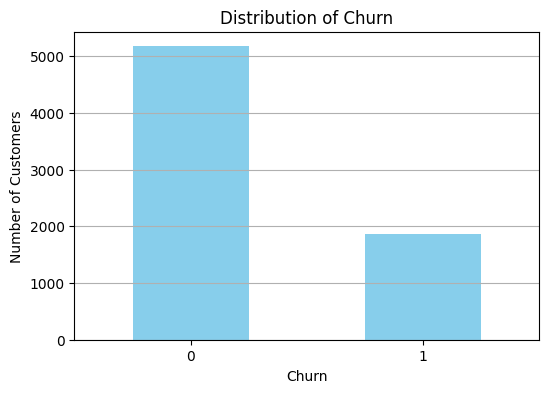

In [169]:
plt.figure(figsize=(6, 4))
df_pp['Churn_numeric'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

In [170]:
X = df_pp.drop(columns=['Churn_numeric'])
Y = df_pp['Churn_numeric']

In [171]:
X.isnull().sum()

TotalCharges                               0
MonthlyCharges                             0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
Contract_Month-to-month                    0
Contract_One year                          0
Contract_Two year                          0
PaymentMethod_Electronic check             0
PaymentMethod_Mailed check                 0
PaymentMethod_Bank transfer (automatic)    0
PaymentMethod_Credit card (automatic)      0
tenure_group                               0
Vulnerability_Score                        0
Services_Score                             0
OnlineSecurity_numeric                     0
TechSupport_numeric                        0
dtype: int64

In [172]:
X_train, X_test, Y_train, Y_test = train_test_split(
                                                    X, Y,
                                                    test_size=0.2,
                                                    random_state=42
                                                    )

In [173]:
smote = SMOTE(random_state=42)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)

Text(0, 0.5, 'Count')

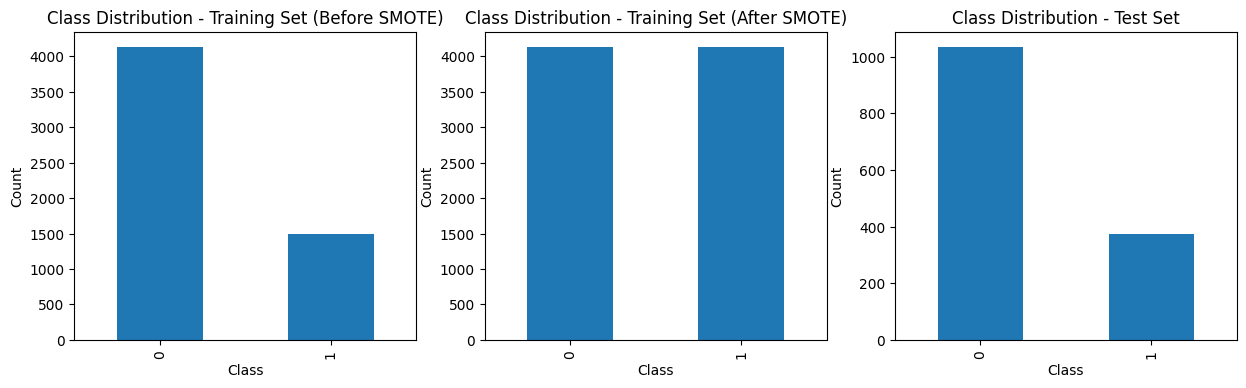

In [174]:
plt.figure(figsize=(15, 4))

# Before SMOTE
plt.subplot(131)
Y_train.value_counts().plot(kind='bar')
plt.title('Class Distribution - Training Set (Before SMOTE)')
plt.xlabel('Class')
plt.ylabel('Count')

# After SMOTE
plt.subplot(132)
Y_train_resampled.value_counts().plot(kind='bar')
plt.title('Class Distribution - Training Set (After SMOTE)')
plt.xlabel('Class')
plt.ylabel('Count')

# Test Set
plt.subplot(133)
Y_test.value_counts().plot(kind='bar')
plt.title('Class Distribution - Test Set')
plt.xlabel('Class')
plt.ylabel('Count')

In [175]:
np.savez('artifacts/X_train.npz', X_train_resampled)
np.savez('artifacts/Y_train.npz', Y_train_resampled)
np.savez('artifacts/X_test.npz', X_test)
np.savez('artifacts/Y_test.npz', Y_test)

### Modal Training